<a href="https://colab.research.google.com/github/milowia/python_wagon/blob/main/3_Enrich_users_profiles_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 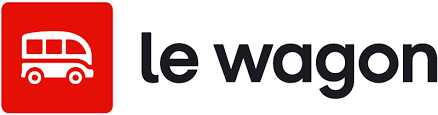

# Enrich users profiles

In this challenge, you will explore a dataset of companies and extract companies information from it!


## General data exploration




Import the [`microsoft_companies.json`](https://drive.google.com/file/d/11OEnC2WS74hv7MdTlOcSeK0UL1KYBXGp/view?usp=sharing) file into Colab.

Run the code below to get the results in the `microsoft_companies` variable. We will study on Day 3 how to load data in Python.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import json

with open('/content/drive/MyDrive/Le Wagon - DA/Jan 21 - Python Intro/microsoft_companies.json') as json_file:
    microsoft_companies = json.load(json_file)

What is the type of the `microsoft_companies` variable?



In [3]:
list

list

How many companies are in this list?

In [4]:
301

301

## Specific data exploration


Look at the first item on this list. What type is it?


In [5]:
dict

dict

For this first item, display the company name, industry, domain and total number of employees.

In [8]:
microsoft_companies[0].keys()

dict_keys(['datasetid', 'recordid', 'fields', 'record_timestamp'])

Do you think that this company named "microsoft" is the giant American company?

> **Your Answer Here (Double click)**


Obviously not ! It seems there are homonyms in our list.

Create a new empty list and add all the companies whose names are exactly "microsoft".

To do this, you will need to loop through all the companies and use a condition to check that their names are indeed "microsoft". If this is the case, the company information will be added to the empty list.

How many are there?

In [9]:
exact_microsoft_companies = []

# iterate through all companies
for company in microsoft_companies:
  if company['fields']['name'] == 'microsoft':
    exact_microsoft_companies.append(company)

    # if statement to be completed
print(exact_microsoft_companies)
print(len(exact_microsoft_companies))

[{'datasetid': 'companies-on-linkedin', 'recordid': 'c4d310fc0f0f277e574e20f5e2185d4765a1ab3f', 'fields': {'total_employee_estimate': 44, 'size_range': '11 - 50', 'industry': 'computer games', 'linkedin_url': 'https://www.linkedin.com/company/develop-magazine', 'domain0': 'https://www.develop-online.net', 'current_employee_estimate': 6, 'name': 'microsoft'}, 'record_timestamp': '2019-06-03T09:35:00+02:00'}, {'datasetid': 'companies-on-linkedin', 'recordid': 'd8611a51def434f1049b899a99d8a589fbb7b9c1', 'fields': {'total_employee_estimate': 276983, 'size_range': '10001+', 'year_founded': '1975', 'industry': 'computer software', 'locality': 'redmond,washington,united states', 'linkedin_url': 'https://www.linkedin.com/company/microsoft', 'country': 'united states', 'domain0': 'https://www.microsoft.com', 'current_employee_estimate': 116196, 'name': 'microsoft'}, 'record_timestamp': '2019-06-03T09:35:00+02:00'}, {'datasetid': 'companies-on-linkedin', 'recordid': 'a5140838fb9ffcda43fa4b8f35cd

Among the results obtained, do you see the giant American company?

You can run the code below and then use the `pprint` function to indent the results. It works like the `print` function with improved readability.

In [10]:
from pprint import pprint
pprint(exact_microsoft_companies)

[{'datasetid': 'companies-on-linkedin',
  'fields': {'current_employee_estimate': 6,
             'domain0': 'https://www.develop-online.net',
             'industry': 'computer games',
             'linkedin_url': 'https://www.linkedin.com/company/develop-magazine',
             'name': 'microsoft',
             'size_range': '11 - 50',
             'total_employee_estimate': 44},
  'record_timestamp': '2019-06-03T09:35:00+02:00',
  'recordid': 'c4d310fc0f0f277e574e20f5e2185d4765a1ab3f'},
 {'datasetid': 'companies-on-linkedin',
  'fields': {'country': 'united states',
             'current_employee_estimate': 116196,
             'domain0': 'https://www.microsoft.com',
             'industry': 'computer software',
             'linkedin_url': 'https://www.linkedin.com/company/microsoft',
             'locality': 'redmond,washington,united states',
             'name': 'microsoft',
             'size_range': '10001+',
             'total_employee_estimate': 276983,
             'year_f

> **Your Answer Here (Double click)**


## Cleaning the data


### Encoding categories

To facilitate the work of the other teams, we will translate the number of employees into categories. To do this, we will use the following correspondences:
   - less than 5: "small business"
   - from 5 to 30: "startup"
   - from 30 to 200: "scaleup"
   - from 200 to 1000: "big companies"
   - more than 1000: "very large companies"


Write a function that takes one argument, the number of employees, and returns the corresponding category.

⚠️ Don't forget to return the corresponding category at the end of your function using the **return** keyword. \
Look carefully at the syntax of functions in the lecture.


In [11]:
def from_nb_employee_to_category(total_employee):

    category = ""

    # to be completed
    category = 'small business' if total_employee < 5 else 'startup' if total_employee < 30 else 'scaleup' if total_employee < 200 else 'big companies' if total_employee < 1000 else 'very large companies'

    return category


print(from_nb_employee_to_category(1500))

very large companies


### Transform the data


We will go through all the companies in the initial file.

We will create an empty list that will record all the information about each company as we go along.

For each company, store in a **dictionary** the company's name, industry, domain and company category (in relation to its number of employees, using your previous function). Then add this dictionary to your list.

In the end, your list will contain all the dictionaries of all the companies.

In [12]:
microsoft_companies_clean = []

# for each company in the list
for company_info in microsoft_companies:

    # to be completed
    # create new dictionnary
    dict_company={'name': company_info['fields']['name'], 'industry': company_info['fields']['industry'], 'domain': company_info['fields']['domain0'], 'size': from_nb_employee_to_category(company_info['fields']['total_employee_estimate'])}

    # to be completed
    # add dict_company to microsoft_companies_clean list
    microsoft_companies_clean.append(dict_company)

pprint(microsoft_companies_clean)
print(len(microsoft_companies_clean))


[{'domain': 'https://www.develop-online.net',
  'industry': 'computer games',
  'name': 'microsoft',
  'size': 'scaleup'},
 {'domain': 'https://www.omahamtg.com',
  'industry': 'information technology and services',
  'name': 'omaha microsoft technology group',
  'size': 'small business'},
 {'domain': 'https://www.',
  'industry': 'non-profit organization management',
  'name': 'microsoft alumni network ambassadors',
  'size': 'small business'},
 {'domain': 'https://www.scbn.biz',
  'industry': 'internet',
  'name': 'scbn | microsoft certified professional - google partner',
  'size': 'startup'},
 {'domain': 'https://www.locatelli-mcc.com',
  'industry': 'information technology and services',
  'name': 'locatelli mcc - designing domotica (voip) solutions combined with '
          'microsoft lync services!',
  'size': 'small business'},
 {'domain': 'https://www.',
  'industry': 'computer software',
  'name': 'chelford solutions for microsoft',
  'size': 'startup'},
 {'domain': 'https://

Use the code below to create a `DataFrame` from it. We will learn more about this Python object in future lectures.

In [13]:
import pandas as pd

df_microsoft_companies_clean = pd.DataFrame(microsoft_companies_clean)
df_microsoft_companies_clean


,name,industry,domain,size
0,microsoft,computer games,https://www.develop-online.net,scaleup
1,omaha microsoft technology group,information technology and services,https://www.omahamtg.com,small business
2,microsoft alumni network ambassadors,non-profit organization management,https://www.,small business
3,scbn | microsoft certified professional - goog...,internet,https://www.scbn.biz,startup
4,locatelli mcc - designing domotica (voip) solu...,information technology and services,https://www.locatelli-mcc.com,small business
...,...,...,...,...
296,pmx dynamics-business software for the real es...,information technology and services,https://www.pmxdynamics.com,startup
297,microsoft game studios,computer software,https://www.,startup
298,microsoft alumni foundation,philanthropy,https://www.microsoftalumni.org,startup
299,naveksa a/s - manufacturing solutions for micr...,computer software,https://www.,small business


Congratulations, you just created your first DataFrame! 🚀

### More accurate cleaning


What do you notice about `domains` column ?

When no domain has been found, the API outputs "https://www.".

This piece of information is not relevant to other teams. Modify your code to delete that.


<details>
    <summary>Hint 🔍</summary>
One way to do so is to not store this key/value pair when iterating over all companies.
</details>

In [16]:
microsoft_companies_clean = []

# for each company in the list
for company_info in microsoft_companies:

    # to be completed
    # create new dictionnary
    if company_info['fields']['domain0']=='https://www.':
      dict_company={'name': company_info['fields']['name'], 'industry': company_info['fields']['industry'], 'domain':'', 'size': from_nb_employee_to_category(company_info['fields']['total_employee_estimate'])}
    else:
      dict_company={'name': company_info['fields']['name'], 'industry': company_info['fields']['industry'], 'domain': company_info['fields']['domain0'], 'size': from_nb_employee_to_category(company_info['fields']['total_employee_estimate'])}
    # to be completed
    # add dict_company to microsoft_companies_clean list
    microsoft_companies_clean.append(dict_company)

pprint(microsoft_companies_clean)
print(len(microsoft_companies_clean))


[{'domain': 'https://www.develop-online.net',
  'industry': 'computer games',
  'name': 'microsoft',
  'size': 'scaleup'},
 {'domain': 'https://www.omahamtg.com',
  'industry': 'information technology and services',
  'name': 'omaha microsoft technology group',
  'size': 'small business'},
 {'domain': '',
  'industry': 'non-profit organization management',
  'name': 'microsoft alumni network ambassadors',
  'size': 'small business'},
 {'domain': 'https://www.scbn.biz',
  'industry': 'internet',
  'name': 'scbn | microsoft certified professional - google partner',
  'size': 'startup'},
 {'domain': 'https://www.locatelli-mcc.com',
  'industry': 'information technology and services',
  'name': 'locatelli mcc - designing domotica (voip) solutions combined with '
          'microsoft lync services!',
  'size': 'small business'},
 {'domain': '',
  'industry': 'computer software',
  'name': 'chelford solutions for microsoft',
  'size': 'startup'},
 {'domain': '',
  'industry': 'computer softw

In [18]:
import pandas as pd

df_microsoft_companies_clean = pd.DataFrame(microsoft_companies_clean)
df_microsoft_companies_clean

,name,industry,domain,size
0,microsoft,computer games,https://www.develop-online.net,scaleup
1,omaha microsoft technology group,information technology and services,https://www.omahamtg.com,small business
2,microsoft alumni network ambassadors,non-profit organization management,,small business
3,scbn | microsoft certified professional - goog...,internet,https://www.scbn.biz,startup
4,locatelli mcc - designing domotica (voip) solu...,information technology and services,https://www.locatelli-mcc.com,small business
...,...,...,...,...
296,pmx dynamics-business software for the real es...,information technology and services,https://www.pmxdynamics.com,startup
297,microsoft game studios,computer software,,startup
298,microsoft alumni foundation,philanthropy,https://www.microsoftalumni.org,startup
299,naveksa a/s - manufacturing solutions for micr...,computer software,,small business


Run the code below to export the clean dataframe to a CSV. We will learn more about the `to_csv()`function in future lectures.


In [17]:
df_microsoft_companies_clean.to_csv("microsoft_companies.csv",index=False)